# Using Sample data in API

In [1]:
import os
SERVICE_URL = os.environ.get("SERVICE_URL")
print(SERVICE_URL)

https://fishingclassification-hfis4rtnsq-ew.a.run.app


In [116]:
import requests


# Define the API endpoint URL
base_url = SERVICE_URL
endpoint = "/sample"

# Define the parameters
params = {
    "sample_request": "drifting_longlines"
}

print( 'query :', f"{base_url}{endpoint}?sample_request=trawlers")
# Make the API request
response = requests.get(f"{base_url}{endpoint}", params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("API good to go")

else:
    print("API request failed with status code:", response.status_code)
    print("Error:", response.text)

query : https://fishingclassification-hfis4rtnsq-ew.a.run.app/sample?sample_request=trawlers
API good to go


In [117]:
import pandas as pd
df = pd.DataFrame(data)
df.shape

(77206, 12)

29


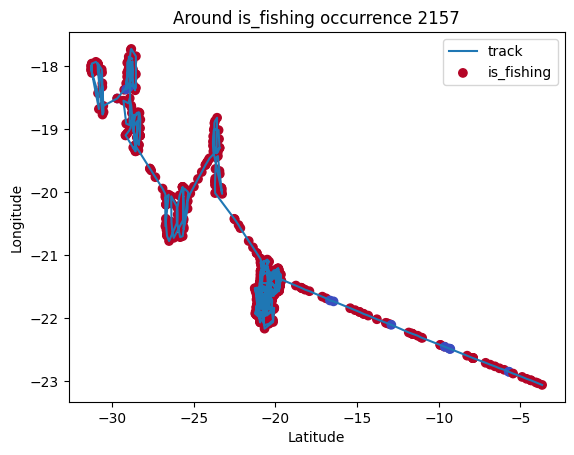

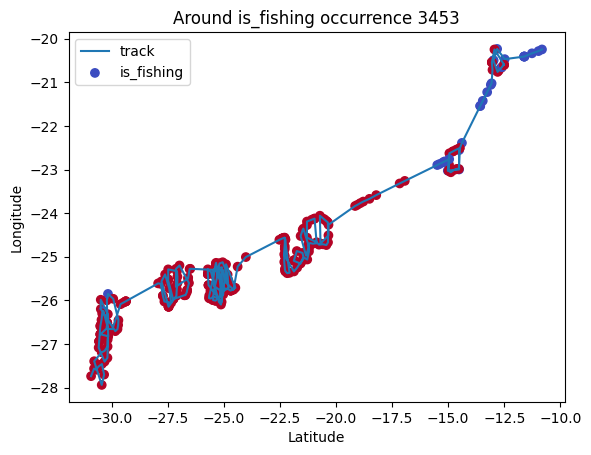

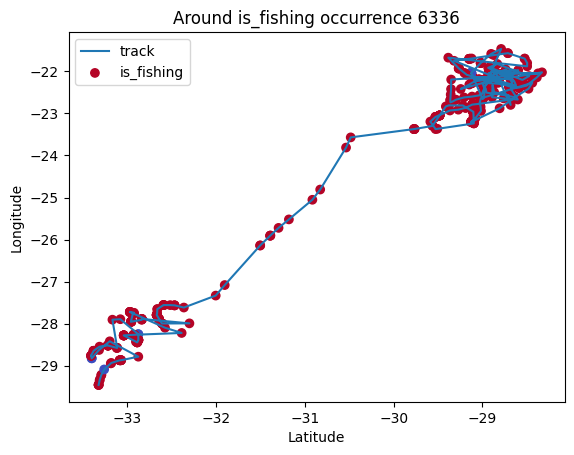

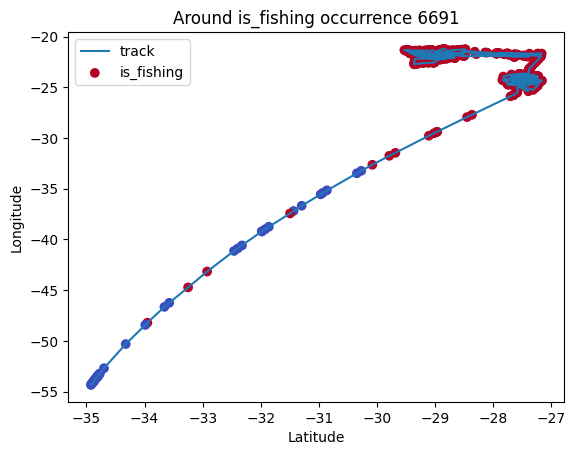

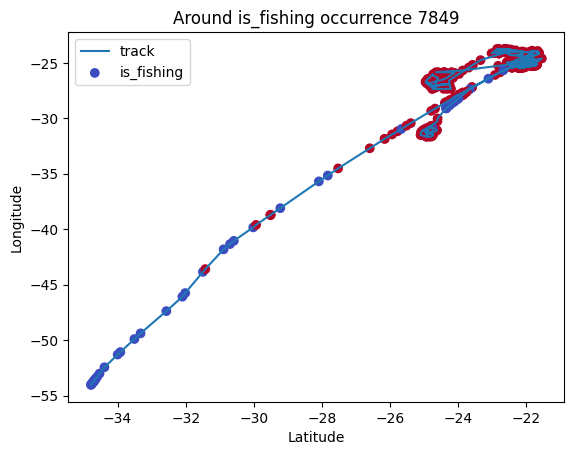

In [124]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'lat', 'lon', and 'is_fishing' columns

# Step 1: Identify the indices of 'is_fishing' occurrences longer than 10 successive rows
diff = df['is_fishing'].diff()
start_indices = diff[diff == 1].index
end_indices = diff[diff == -1].index

long_occurrences = []
for start, end in zip(start_indices, end_indices):
    if end - start > 200:
        long_occurrences.append((start, end))
        
print(len(long_occurrences))

# Step 2 and 3: Create and plot the subsets around long 'is_fishing' occurrences
window_size = 50
for start, end in long_occurrences[:5]:
    subset_start = max(0, start - window_size)
    subset_end = min(len(df), end + window_size)
    subset = df.iloc[subset_start:subset_end]
    
    plt.plot(subset['lat'], subset['lon'], label='track')
    plt.scatter(subset['lat'], subset['lon'], c=subset['is_fishing'], cmap='coolwarm', label='is_fishing')
    plt.title(f'Around is_fishing occurrence {start}')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    
    plt.legend()
    plt.show()